In [1]:
import os
os.getcwd()


'C:\\Users\\PHANINDRA'

In [3]:
os.chdir(r"C:\Users\PHANINDRA\Desktop\my internship")

In [4]:
os.getcwd()

'C:\\Users\\PHANINDRA\\Desktop\\my internship'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
#saving the bollinger band columns
INFRATEL = pd.read_csv('INFRATEL.csv')
INFRATEL['14 Day AM'] = INFRATEL['Close Price'].rolling(window=14).mean()
INFRATEL['30 Day STD'] = INFRATEL['Close Price'].rolling(window=20).std()
INFRATEL['Upper Band'] = INFRATEL['14 Day AM'] + (INFRATEL['30 Day STD'] * 2)
INFRATEL['Lower Band'] = INFRATEL['14 Day AM'] - (INFRATEL['30 Day STD'] * 2)
INFRATEL = INFRATEL.dropna()
INFRATEL['Mid Band'] = (INFRATEL['Upper Band']+INFRATEL['Lower Band'])/2
INFRATEL

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day AM,30 Day STD,Upper Band,Lower Band,Mid Band
19,INFRATEL,EQ,09-Jun-2017,379.85,379.85,384.75,377.10,383.00,382.65,381.29,1545424,5.892548e+08,34955,494657,32.01,376.621429,6.236332,389.094093,364.148764,376.621429
20,INFRATEL,EQ,12-Jun-2017,382.65,380.55,386.00,376.80,384.75,384.75,382.05,1660758,6.344843e+08,47895,728996,43.90,376.971429,6.208231,389.387890,364.554967,376.971429
21,INFRATEL,EQ,13-Jun-2017,384.75,385.00,389.85,379.55,381.55,384.20,384.56,1863956,7.168024e+08,38488,580484,31.14,378.057143,6.317442,390.692027,365.422259,378.057143
22,INFRATEL,EQ,14-Jun-2017,384.20,382.70,387.40,381.45,386.90,386.10,384.75,1317476,5.068970e+08,39782,825288,62.64,378.957143,6.018228,390.993600,366.920686,378.957143
23,INFRATEL,EQ,15-Jun-2017,386.10,385.30,389.10,370.65,378.25,374.80,378.94,2369536,8.979236e+08,33682,1201629,50.71,379.303571,6.079765,391.463102,367.144041,379.303571
24,INFRATEL,EQ,16-Jun-2017,374.80,374.80,384.65,373.25,375.00,375.10,379.31,2699975,1.024121e+09,53617,1350780,50.03,379.000000,6.124635,391.249271,366.750729,379.000000
25,INFRATEL,EQ,19-Jun-2017,375.10,376.00,383.90,373.50,375.05,376.55,380.64,2163886,8.236665e+08,50329,1353450,62.55,379.307143,5.692553,390.692249,367.922037,379.307143
26,INFRATEL,EQ,20-Jun-2017,376.55,377.15,381.50,375.70,377.75,377.10,378.48,1331396,5.039095e+08,27127,283356,21.28,380.057143,5.671315,391.399772,368.714514,380.057143
27,INFRATEL,EQ,21-Jun-2017,377.10,377.50,378.10,370.50,371.05,371.70,374.03,2388975,8.935386e+08,67053,1379532,57.75,379.732143,5.485610,390.703362,368.760923,379.732143
28,INFRATEL,EQ,22-Jun-2017,371.70,372.20,376.50,371.00,374.90,375.00,374.83,1120673,4.200602e+08,40145,595546,53.14,379.757143,5.435078,390.627299,368.886987,379.757143


In [6]:
def select(INFRATEL):
    if INFRATEL['Close Price'] < INFRATEL['Lower Band']:
        return "Buy"
    if INFRATEL['Close Price'] > INFRATEL['Lower Band'] and INFRATEL['Close Price'] < INFRATEL['Mid Band']:
        return "Hold Buy/ Liquidate Short"
    if INFRATEL['Close Price'] > INFRATEL['Mid Band'] and INFRATEL['Close Price'] < INFRATEL['Upper Band']:
        return "Hold Short/ Liquidate Buy"
    if INFRATEL['Close Price'] > INFRATEL['Upper Band']:
        return "Short"
INFRATEL = INFRATEL.assign(Call = INFRATEL.apply(select, axis=1))
INFRATEL

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day AM,30 Day STD,Upper Band,Lower Band,Mid Band,Call
19,INFRATEL,EQ,09-Jun-2017,379.85,379.85,384.75,377.10,383.00,382.65,381.29,...,5.892548e+08,34955,494657,32.01,376.621429,6.236332,389.094093,364.148764,376.621429,Hold Short/ Liquidate Buy
20,INFRATEL,EQ,12-Jun-2017,382.65,380.55,386.00,376.80,384.75,384.75,382.05,...,6.344843e+08,47895,728996,43.90,376.971429,6.208231,389.387890,364.554967,376.971429,Hold Short/ Liquidate Buy
21,INFRATEL,EQ,13-Jun-2017,384.75,385.00,389.85,379.55,381.55,384.20,384.56,...,7.168024e+08,38488,580484,31.14,378.057143,6.317442,390.692027,365.422259,378.057143,Hold Short/ Liquidate Buy
22,INFRATEL,EQ,14-Jun-2017,384.20,382.70,387.40,381.45,386.90,386.10,384.75,...,5.068970e+08,39782,825288,62.64,378.957143,6.018228,390.993600,366.920686,378.957143,Hold Short/ Liquidate Buy
23,INFRATEL,EQ,15-Jun-2017,386.10,385.30,389.10,370.65,378.25,374.80,378.94,...,8.979236e+08,33682,1201629,50.71,379.303571,6.079765,391.463102,367.144041,379.303571,Hold Buy/ Liquidate Short
24,INFRATEL,EQ,16-Jun-2017,374.80,374.80,384.65,373.25,375.00,375.10,379.31,...,1.024121e+09,53617,1350780,50.03,379.000000,6.124635,391.249271,366.750729,379.000000,Hold Buy/ Liquidate Short
25,INFRATEL,EQ,19-Jun-2017,375.10,376.00,383.90,373.50,375.05,376.55,380.64,...,8.236665e+08,50329,1353450,62.55,379.307143,5.692553,390.692249,367.922037,379.307143,Hold Buy/ Liquidate Short
26,INFRATEL,EQ,20-Jun-2017,376.55,377.15,381.50,375.70,377.75,377.10,378.48,...,5.039095e+08,27127,283356,21.28,380.057143,5.671315,391.399772,368.714514,380.057143,Hold Buy/ Liquidate Short
27,INFRATEL,EQ,21-Jun-2017,377.10,377.50,378.10,370.50,371.05,371.70,374.03,...,8.935386e+08,67053,1379532,57.75,379.732143,5.485610,390.703362,368.760923,379.732143,Hold Buy/ Liquidate Short
28,INFRATEL,EQ,22-Jun-2017,371.70,372.20,376.50,371.00,374.90,375.00,374.83,...,4.200602e+08,40145,595546,53.14,379.757143,5.435078,390.627299,368.886987,379.757143,Hold Buy/ Liquidate Short


In [7]:
#training a classifier
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
train_X = INFRATEL[['Upper Band','Lower Band','Mid Band','Close Price']]
transformed_label = le.fit_transform(INFRATEL[['Call']])
train_Y = transformed_label.reshape(-1,1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
print(train_X,train_Y)

     Upper Band  Lower Band    Mid Band  Close Price
19   389.094093  364.148764  376.621429       382.65
20   389.387890  364.554967  376.971429       384.75
21   390.692027  365.422259  378.057143       384.20
22   390.993600  366.920686  378.957143       386.10
23   391.463102  367.144041  379.303571       374.80
24   391.249271  366.750729  379.000000       375.10
25   390.692249  367.922037  379.307143       376.55
26   391.399772  368.714514  380.057143       377.10
27   390.703362  368.760923  379.732143       371.70
28   390.627299  368.886987  379.757143       375.00
29   389.598428  368.444429  379.021429       372.15
30   389.064049  367.571666  378.317857       373.30
31   388.303057  367.368372  377.835714       376.45
32   386.760761  368.674954  377.717857       378.20
33   386.297710  367.980861  377.139286       374.55
34   390.523632  365.612083  378.067857       397.75
35   395.189039  363.425247  379.307143       401.55
36   399.344350  361.691364  380.517857       

In [9]:
import sklearn as sk  
from sklearn.linear_model import LogisticRegression  
import pandas as pd  
import os

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(train_X, train_Y.ravel())
LR.predict(train_X) 
print("Logistic Regression")
round(LR.score(train_X,train_Y), 4)

Logistic Regression


0.9011

In [10]:
import sklearn as sk  
from sklearn import svm  
import pandas as pd  
import os

SVM = svm.LinearSVC()
SVM.fit(train_X, train_Y)
SVM.predict(train_X)
print("Support Vector Machines")
round(SVM.score(train_X,train_Y), 4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machines


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5958

In [11]:
import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

Random Forests


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.6589

In [12]:
import sklearn as sk  
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(train_X, train_Y)  
NN.predict(train_X)
print("Neural Networks")
round(NN.score(train_X, train_Y), 4)

Neural Networks


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5537

In [13]:
import pandas as pd
reliance_data = pd.read_csv('Large_Cap/RELIANCE.csv')
reliance_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,15-May-2017,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
1,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2,RELIANCE,EQ,17-May-2017,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
3,RELIANCE,EQ,18-May-2017,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
4,RELIANCE,EQ,19-May-2017,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32
5,RELIANCE,EQ,22-May-2017,1318.85,1326.50,1333.60,1315.20,1326.00,1324.15,1322.82,2011859,2.661318e+09,89828,1123947,55.87
6,RELIANCE,EQ,23-May-2017,1324.15,1325.70,1329.85,1302.00,1304.55,1305.55,1313.55,2108223,2.769247e+09,81667,1172410,55.61
7,RELIANCE,EQ,24-May-2017,1305.55,1307.50,1313.70,1295.10,1299.00,1297.70,1302.71,3274804,4.266122e+09,78535,1782580,54.43
8,RELIANCE,EQ,25-May-2017,1297.70,1300.00,1312.40,1296.45,1301.50,1302.45,1303.19,5925335,7.721843e+09,114553,4678965,78.97
9,RELIANCE,EQ,26-May-2017,1302.45,1303.95,1344.40,1300.00,1339.00,1337.30,1320.18,4898639,6.467103e+09,111248,2843822,58.05


In [14]:
reliance_data['per_change_(cp-lp)'] = ((reliance_data['Close Price'] - reliance_data ['Open Price'])/(reliance_data['Close Price']))*100
reliance_data['per_change_(cp-hp)'] = ((reliance_data['Close Price'] - reliance_data ['High Price'])/(reliance_data['Low Price']))*100
reliance_data['per_change_5_day_mean'] = reliance_data['Close Price'].pct_change().dropna().rolling(5).mean()
reliance_data['per_change_5_day_std'] = reliance_data['Close Price'].pct_change().dropna().rolling(5).std()
reliance_data = reliance_data.dropna()
reliance_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,per_change_(cp-lp),per_change_(cp-hp),per_change_5_day_mean,per_change_5_day_std
5,RELIANCE,EQ,22-May-2017,1318.85,1326.50,1333.60,1315.20,1326.00,1324.15,1322.82,2011859,2.661318e+09,89828,1123947,55.87,-0.177472,-0.718522,-0.002940,0.010771
6,RELIANCE,EQ,23-May-2017,1324.15,1325.70,1329.85,1302.00,1304.55,1305.55,1313.55,2108223,2.769247e+09,81667,1172410,55.61,-1.543411,-1.866359,-0.007564,0.009166
7,RELIANCE,EQ,24-May-2017,1305.55,1307.50,1313.70,1295.10,1299.00,1297.70,1302.71,3274804,4.266122e+09,78535,1782580,54.43,-0.755182,-1.235426,-0.008295,0.008786
8,RELIANCE,EQ,25-May-2017,1297.70,1300.00,1312.40,1296.45,1301.50,1302.45,1303.19,5925335,7.721843e+09,114553,4678965,78.97,0.188107,-0.767480,-0.003757,0.007640
9,RELIANCE,EQ,26-May-2017,1302.45,1303.95,1344.40,1300.00,1339.00,1337.30,1320.18,4898639,6.467103e+09,111248,2843822,58.05,2.493831,-0.546154,0.002875,0.015310
10,RELIANCE,EQ,29-May-2017,1337.30,1337.00,1365.45,1335.60,1355.25,1356.90,1352.77,5491170,7.428268e+09,88604,2590759,47.18,1.466578,-0.640162,0.005003,0.016221
11,RELIANCE,EQ,30-May-2017,1356.90,1355.90,1364.70,1348.50,1360.00,1359.35,1357.25,2207727,2.996432e+09,71958,1133031,51.32,0.253798,-0.396737,0.008173,0.012743
12,RELIANCE,EQ,31-May-2017,1359.35,1367.00,1367.95,1335.80,1340.00,1340.70,1346.68,3754099,5.055552e+09,153444,2447584,65.20,-1.961662,-2.039976,0.006632,0.015131
13,RELIANCE,EQ,01-Jun-2017,1340.70,1332.70,1340.00,1323.00,1329.85,1328.25,1329.31,2179328,2.896998e+09,79314,1229535,56.42,-0.335027,-0.888133,0.004043,0.016784
14,RELIANCE,EQ,02-Jun-2017,1328.25,1335.00,1338.70,1317.00,1322.90,1324.75,1326.29,2627565,3.484909e+09,92530,1625375,61.86,-0.773731,-1.059226,-0.001836,0.010984


In [15]:
arr = []
val = []
for value in reliance_data['Close Price'].iteritems():
    arr.append(value[1])
for i in range(0,443):
    if arr[i+1] > arr[i]:
        val.append(1)
    else:
        val.append(-1)
reliance_data['Action'] = pd.DataFrame(val)
reliance_data = reliance_data.dropna()
reliance_data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,per_change_(cp-lp),per_change_(cp-hp),per_change_5_day_mean,per_change_5_day_std,Action
5,RELIANCE,EQ,22-May-2017,1318.85,1326.50,1333.60,1315.20,1326.00,1324.15,1322.82,2011859,2.661318e+09,89828,1123947,55.87,-0.177472,-0.718522,-0.002940,0.010771,1.0
6,RELIANCE,EQ,23-May-2017,1324.15,1325.70,1329.85,1302.00,1304.55,1305.55,1313.55,2108223,2.769247e+09,81667,1172410,55.61,-1.543411,-1.866359,-0.007564,0.009166,-1.0
7,RELIANCE,EQ,24-May-2017,1305.55,1307.50,1313.70,1295.10,1299.00,1297.70,1302.71,3274804,4.266122e+09,78535,1782580,54.43,-0.755182,-1.235426,-0.008295,0.008786,-1.0
8,RELIANCE,EQ,25-May-2017,1297.70,1300.00,1312.40,1296.45,1301.50,1302.45,1303.19,5925335,7.721843e+09,114553,4678965,78.97,0.188107,-0.767480,-0.003757,0.007640,-1.0
9,RELIANCE,EQ,26-May-2017,1302.45,1303.95,1344.40,1300.00,1339.00,1337.30,1320.18,4898639,6.467103e+09,111248,2843822,58.05,2.493831,-0.546154,0.002875,0.015310,1.0
10,RELIANCE,EQ,29-May-2017,1337.30,1337.00,1365.45,1335.60,1355.25,1356.90,1352.77,5491170,7.428268e+09,88604,2590759,47.18,1.466578,-0.640162,0.005003,0.016221,-1.0
11,RELIANCE,EQ,30-May-2017,1356.90,1355.90,1364.70,1348.50,1360.00,1359.35,1357.25,2207727,2.996432e+09,71958,1133031,51.32,0.253798,-0.396737,0.008173,0.012743,1.0
12,RELIANCE,EQ,31-May-2017,1359.35,1367.00,1367.95,1335.80,1340.00,1340.70,1346.68,3754099,5.055552e+09,153444,2447584,65.20,-1.961662,-2.039976,0.006632,0.015131,-1.0
13,RELIANCE,EQ,01-Jun-2017,1340.70,1332.70,1340.00,1323.00,1329.85,1328.25,1329.31,2179328,2.896998e+09,79314,1229535,56.42,-0.335027,-0.888133,0.004043,0.016784,1.0
14,RELIANCE,EQ,02-Jun-2017,1328.25,1335.00,1338.70,1317.00,1322.90,1324.75,1326.29,2627565,3.484909e+09,92530,1625375,61.86,-0.773731,-1.059226,-0.001836,0.010984,-1.0


In [16]:
#training a classifier
from sklearn import preprocessing
# create the Labelencoder object
# le = preprocessing.LabelEncoder()
train_X = reliance_data[['per_change_(cp-lp)','per_change_(cp-hp)','per_change_5_day_mean','per_change_5_day_std']]
train_Y = reliance_data[['Action']]
# trafomed_label = le.fit_transform(tcs_dat[['Call']])
# train_Y = transfomed_label.reshape(-1,1)

import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

Random Forests


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.6096

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


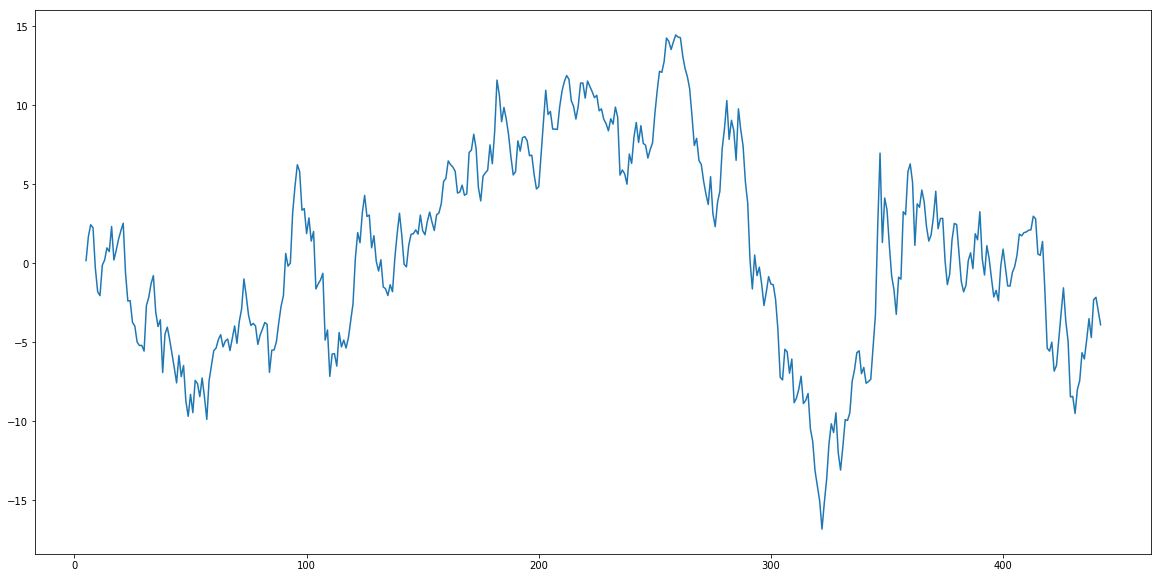

In [17]:
reliance_data['Net Cummulative Returns'] = (((reliance_data['Open Price'] - reliance_data['Close Price'])/(reliance_data['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.plot(reliance_data['Net Cummulative Returns'])